In [1]:
import pandas as pd
import pandas_profiling

import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from sklearn.cluster import KMeans, SpectralClustering

import pydot
from IPython.display import Image

import time
from sklearn.manifold import TSNE
import seaborn as sb
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)

/Users/lukmac/.local/share/virtualenvs/data-mining-nba-jhiA2YFt/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


NameError: name 'sns' is not defined

# Import

In [2]:
players_df = pd.read_csv('data/players.csv')
salaries_df = pd.read_csv('data/salaries.csv')

# Overview - Preprocessing

## Data - Players

In [3]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4685 entries, 0 to 4684
Data columns (total 24 columns):
_id            4685 non-null object
birthDate      4657 non-null object
birthPlace     4185 non-null object
career_AST     4685 non-null float64
career_FG%     4685 non-null object
career_FG3%    3557 non-null object
career_FT%     4685 non-null object
career_G       4685 non-null int64
career_PER     4685 non-null object
career_PTS     4685 non-null float64
career_TRB     4685 non-null object
career_WS      4685 non-null object
career_eFG%    3557 non-null object
college        4372 non-null object
draft_pick     3369 non-null object
draft_round    3507 non-null object
draft_team     3507 non-null object
draft_year     3306 non-null object
height         4685 non-null object
highSchool     4025 non-null object
name           4685 non-null object
position       4685 non-null object
shoots         4684 non-null object
weight         4680 non-null object
dtypes: float64(2), int64(1)

In [4]:
players_df.head()

,_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,...,draft_pick,draft_round,draft_team,draft_year,height,highSchool,name,position,shoots,weight
0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,...,25th overall,1st round,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb
1,abdulza01,"April 7, 1946","Brooklyn, New York",1.2,42.8,NaN,72.8,505,15.1,9.0,...,5th overall,1st round,Cincinnati Royals,1968,6-9,"John Jay in Brooklyn, New York",Zaid Abdul-Aziz,Power Forward and Center,Right,235lb
2,abdulka01,"April 16, 1947","New York, New York",3.6,55.9,5.6,72.1,1560,24.6,24.6,...,1st overall,1st round,Milwaukee Bucks,1969,7-2,"Power Memorial in New York, New York",Kareem Abdul-Jabbar,Center,Right,225lb
3,abdulma02,"March 9, 1969","Gulfport, Mississippi",3.5,44.2,35.4,90.5,586,15.4,14.6,...,3rd overall,1st round,Denver Nuggets,1990,6-1,"Gulfport in Gulfport, Mississippi",Mahmoud Abdul-Rauf,Point Guard,Right,162lb
4,abdulta01,"November 3, 1974","Maisons Alfort, France",1.1,41.7,23.7,70.3,236,11.4,7.8,...,11th overall,1st round,Sacramento Kings,1997,6-6,"Lycee Aristide Briand in Evreux, France",Tariq Abdul-Wahad,Shooting Guard,Right,223lb


In [5]:
players_df.tail()

,_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,...,draft_pick,draft_round,draft_team,draft_year,height,highSchool,name,position,shoots,weight
4680,zizican01,"January 4, 1997","Split, Croatia",0.6,58.3,-,70.8,91,17.5,6.4,...,23rd overall,1st round,Boston Celtics,2016,6-11,NaN,Ante Zizic,Center,Right,254lb
4681,zoetji01,"December 20, 1953","Uxbridge, Canada",0.1,20.0,-,-,7,-0.8,0.3,...,NaN,NaN,NaN,NaN,7-1,"Port Perry in Port Perry, Canada",Jim Zoet,Center,Right,240lb
4682,zopfbi01,"June 7, 1948",NaN,1.4,36.3,NaN,55.6,53,9.6,2.2,...,33rd overall,2nd round,Milwaukee Bucks,1970,6-1,"Monaca in Monaca, Pennsylvania",Bill Zopf,Point Guard,Right,170lb
4683,zubaciv01,"March 18, 1997","Mostar, Bosnia and Herzegovina",0.8,54.0,0.0,76.1,140,17.6,6.9,...,32nd overall,2nd round,Los Angeles Lakers,2016,7-1,NaN,Ivica Zubac,Center,Right,240lb
4684,zunicma01,"December 19, 1919","Renton, Pennsylvania",0.9,30.3,NaN,70.6,56,-,4.9,...,NaN,1947 BAA Draf,Washington Capitols,NaN,6-3,NaN,Matt Zunic,Guard/Forward,Right,195lb


## Data - Salaries

In [6]:
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14163 entries, 0 to 14162
Data columns (total 7 columns):
league          14163 non-null object
player_id       14163 non-null object
salary          14163 non-null int64
season          14163 non-null object
season_end      14163 non-null int64
season_start    14163 non-null int64
team            14159 non-null object
dtypes: int64(3), object(4)
memory usage: 774.7+ KB


In [7]:
salaries_df.head()

,league,player_id,salary,season,season_end,season_start,team
0,NBA,abdelal01,395000,1990-91,1991,1990,Portland Trail Blazers
1,NBA,abdelal01,494000,1991-92,1992,1991,Portland Trail Blazers
2,NBA,abdelal01,500000,1992-93,1993,1992,Boston Celtics
3,NBA,abdelal01,805000,1993-94,1994,1993,Boston Celtics
4,NBA,abdelal01,650000,1994-95,1995,1994,Sacramento Kings


In [8]:
salaries_df.tail()

,league,player_id,salary,season,season_end,season_start,team
14158,NBA,zipsepa01,750000,2016-17,2017,2016,Chicago Bulls
14159,NBA,zipsepa01,1312611,2017-18,2018,2017,Chicago Bulls
14160,NBA,zizican01,1645200,2017-18,2018,2017,Cleveland Cavaliers
14161,NBA,zubaciv01,1034956,2016-17,2017,2016,Los Angeles Lakers
14162,NBA,zubaciv01,1312611,2017-18,2018,2017,Los Angeles Lakers


In [9]:
salaries_df.sample(7)

,league,player_id,salary,season,season_end,season_start,team
12871,NBA,vaughja01,1262275,2008-09,2009,2008,San Antonio Spurs
10280,NBA,powele01,797581,2008-09,2009,2008,Boston Celtics
6024,NBA,huntest01,3024000,2006-07,2007,2006,Philadelphia 76ers
10227,NBA,porteot01,5893981,2016-17,2017,2016,Washington Wizards
595,NBA,augmost01,923500,2000-01,2001,2000,Portland Trail Blazers
5704,NBA,hinriki01,9500000,2009-10,2010,2009,Chicago Bulls
5619,NBA,higgiro01,15800,1994-95,1995,1994,Golden State Warriors


## Salaries with player information

In [10]:
def generate_base_df():
    return pd.merge(players_df, salaries_df, left_on='_id', right_on='player_id')

df = generate_base_df();

In [11]:
df.head()

,_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,...,position,shoots,weight,league,player_id,salary,season,season_end,season_start,team
0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,...,Power Forward,Right,240lb,NBA,abdelal01,395000,1990-91,1991,1990,Portland Trail Blazers
1,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,...,Power Forward,Right,240lb,NBA,abdelal01,494000,1991-92,1992,1991,Portland Trail Blazers
2,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,...,Power Forward,Right,240lb,NBA,abdelal01,500000,1992-93,1993,1992,Boston Celtics
3,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,...,Power Forward,Right,240lb,NBA,abdelal01,805000,1993-94,1994,1993,Boston Celtics
4,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,...,Power Forward,Right,240lb,NBA,abdelal01,650000,1994-95,1995,1994,Sacramento Kings


In [12]:
df.tail()

,_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,...,position,shoots,weight,league,player_id,salary,season,season_end,season_start,team
14158,zipsepa01,"February 18, 1994","Heidelberg, Germany",0.8,37.1,33.5,76.9,98,6.1,4.7,...,Small Forward,Right,215lb,NBA,zipsepa01,750000,2016-17,2017,2016,Chicago Bulls
14159,zipsepa01,"February 18, 1994","Heidelberg, Germany",0.8,37.1,33.5,76.9,98,6.1,4.7,...,Small Forward,Right,215lb,NBA,zipsepa01,1312611,2017-18,2018,2017,Chicago Bulls
14160,zizican01,"January 4, 1997","Split, Croatia",0.6,58.3,-,70.8,91,17.5,6.4,...,Center,Right,254lb,NBA,zizican01,1645200,2017-18,2018,2017,Cleveland Cavaliers
14161,zubaciv01,"March 18, 1997","Mostar, Bosnia and Herzegovina",0.8,54.0,0.0,76.1,140,17.6,6.9,...,Center,Right,240lb,NBA,zubaciv01,1034956,2016-17,2017,2016,Los Angeles Lakers
14162,zubaciv01,"March 18, 1997","Mostar, Bosnia and Herzegovina",0.8,54.0,0.0,76.1,140,17.6,6.9,...,Center,Right,240lb,NBA,zubaciv01,1312611,2017-18,2018,2017,Los Angeles Lakers


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14163 entries, 0 to 14162
Data columns (total 31 columns):
_id             14163 non-null object
birthDate       14163 non-null object
birthPlace      14163 non-null object
career_AST      14163 non-null float64
career_FG%      14163 non-null object
career_FG3%     14163 non-null object
career_FT%      14163 non-null object
career_G        14163 non-null int64
career_PER      14163 non-null object
career_PTS      14163 non-null float64
career_TRB      14163 non-null object
career_WS       14163 non-null object
career_eFG%     14163 non-null object
college         12527 non-null object
draft_pick      12261 non-null object
draft_round     12261 non-null object
draft_team      12261 non-null object
draft_year      12261 non-null object
height          14163 non-null object
highSchool      13174 non-null object
name            14163 non-null object
position        14163 non-null object
shoots          14163 non-null object
weight          

In [14]:
df.drop(columns=['player_id'], inplace=True)

In [15]:
df.rename(columns={"_id": "id"}, inplace=True)

In [16]:
df.columns

Index(['id', 'birthDate', 'birthPlace', 'career_AST', 'career_FG%',
       'career_FG3%', 'career_FT%', 'career_G', 'career_PER', 'career_PTS',
       'career_TRB', 'career_WS', 'career_eFG%', 'college', 'draft_pick',
       'draft_round', 'draft_team', 'draft_year', 'height', 'highSchool',
       'name', 'position', 'shoots', 'weight', 'league', 'salary', 'season',
       'season_end', 'season_start', 'team'],
      dtype='object')

In [17]:
# df.profile_report()

# Regressionsproblem

Für den Salary Datensatz kannst du versuchen mit Regressionsmethoden, die Gehälter zu predicten (Welche Features sind ausschlaggebend für ein hohes bzw niedriges Gehalt? Verdient man mehr als Point oder Shooting Guard?). Dimensionality Reduction kannst du zum Visualisieren benutzen um visuell zu sehen, ob es Gruppierungen bei den Spielern gibt (Welche Features sind dabei wichtig? zb College oder Position).

Mit Clustering kannst du dann die Spieler in k Gruppen einteilen, abhängig von den sportlichen Werten (Wenn man ähnlich gute sportliche Werte hat, hat man dann auch ein ähnliches gutes Gehalt? Verdient man mehr, wenn man gut in der Defensive oder Offensive ist?).

# === === === === === === === === ===
# === === === === === === === === ===

# Preprocessing

In [344]:
df = generate_base_df();

In [345]:
# df.profile_report()

In [346]:
df.columns

Index(['_id', 'birthDate', 'birthPlace', 'career_AST', 'career_FG%',
       'career_FG3%', 'career_FT%', 'career_G', 'career_PER', 'career_PTS',
       'career_TRB', 'career_WS', 'career_eFG%', 'college', 'draft_pick',
       'draft_round', 'draft_team', 'draft_year', 'height', 'highSchool',
       'name', 'position', 'shoots', 'weight', 'league', 'player_id', 'salary',
       'season', 'season_end', 'season_start', 'team'],
      dtype='object')

In [347]:
pd.DataFrame(abs(df.corr().salary).sort_values(ascending = False))

,salary
salary,1.000000
career_PTS,0.485203
career_G,0.367692
season_start,0.356966
season_end,0.356966
career_AST,0.262386


## ID's

Die Spalten mit __ID's__ können ohne weitere Bedenken entfernt werden, da es sich dabei um Werte handelt, die immer unterschiedlich sein sollten.

In [348]:
df.drop(columns=['_id', 'player_id'], inplace=True)

## League

Laut dem _Pandas Profiling Report_ handelt es sich bei der Variable __league__ um eine Konstante - _constant_. Jeder Spieler in diesem Datensatz ist Teil der _NBA_, wodurch dieses Feature keinen Mehrwert schaffen würde.

In [349]:
df['league'].describe()

count     14163
unique        1
top         NBA
freq      14163
Name: league, dtype: object

In [350]:
df.drop(columns=['league'], inplace=True)

## Birth Date

Laut dem _Pandas Profiling Report_ weißt die Variable __birthDate__ _high cardinality_ auf. Prinzipiell könnten die Features _birth_month_, _birth_day_ und _birth_year_ aus der genannten Variable entnommen werden. Dies scheint auf den ersten Blick jedoch keinen wirklichen Mehrwert zu bieten. Das aktuelle Alter des jeweiligen Spielers in der jeweiligen Saison zu beachten wirklt hingegen interessanter. Daher wird das Feature __age__ eingeführt.

In [351]:
df['birthDate'].describe()

count             14163
unique             2235
top       June 26, 1984
freq                 41
Name: birthDate, dtype: object

### Age

Zunächst kann das Geburtsjahr entnommen werden.

In [352]:
def birthDateToBirthYear(birthDate):
    return birthDate.split()[2]

In [353]:
df['birth_year'] = df['birthDate']
df['birth_year'] = df['birth_year'].apply(birthDateToBirthYear)

In [354]:
df['birth_year'] = df['birth_year'].astype(int)

In [355]:
df['birth_year'].sample(7)

5418     1979
13908    1963
247      1976
6204     1970
5221     1993
2137     1986
7387     1966
Name: birth_year, dtype: int64

Anschließend kann das Alter in Monaten berechnet werden.

In [356]:
df['age_in_months'] = df['season_end'].astype(int) - df['birth_year'].astype(int)

In [357]:
df['age_in_months'] = df['age_in_months'].apply(lambda x: x * 12)

In [358]:
df['age_in_months'].sample(7)

7457     312
1018     396
2821     300
8234     348
237      420
9989     372
11371    324
Name: age_in_months, dtype: int64

Letzendlich können die unbenötigten Features vom Datensatz entfernt werden.

In [359]:
df.drop(columns=['birth_year', 'birthDate'], inplace=True)

## Birth Place

Laut dem _Pandas Profiling Report_ weißt die Variable __birthPlace__ eine _high cardinality_ auf. Deshalb soll nur das Land in Betracht gezogen werden.

In [360]:
df['birthPlace'].describe()

count                 14163
unique                 1055
top       Chicago, Illinois
freq                    487
Name: birthPlace, dtype: object

In [361]:
def generalizeBirthPlace(birthPlace):
    splitted =  birthPlace.split(",")
    
    return splitted[1] if len(splitted) >= 2 else ",".join(splitted)

In [362]:
def statesToUSA(birthPlace):
    states = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado","Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
              "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland","Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
              "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York","North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
              "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah","Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]
    
    def process(string):
        return string.lower().strip()
        
    states = map(process, states)
    
    return "USA" if process(birthPlace) in states else birthPlace

In [363]:
df['birthPlace'] = df['birthPlace'].apply(generalizeBirthPlace)

In [364]:
df['birthPlace'] = df['birthPlace'].apply(statesToUSA)

In [365]:
df.rename(columns={"birthPlace": "birth_country"}, inplace=True)

In [366]:
df['birth_country'].sample(7)

3305    USA
8592    USA
7337    USA
5466    USA
4708    USA
8287    USA
3643    USA
Name: birth_country, dtype: object

In [367]:
df['birth_country'].describe()

count     14163
unique       81
top         USA
freq      11923
Name: birth_country, dtype: object

In [368]:
df = pd.get_dummies(df, columns=['birth_country'])

## College

Laut dem _Pandas Profiling Report_ weißt die Variable __college__ _high cardinality_ und _missing data_ auf. Das Problem der fehlenden Datenpunkte wird durch folgende Annahme behoben: Fehlende Datenpunkte repräsentieren Spieler, die kein College besucht haben. _LeBron James_ hat beispielsweise kein College eingetragen und auch tatsächlich kein College besucht. Deshalb wird der Wert _NO_COLLEGE_ bei diesen Spielern hinzugefügt. Das Problem der hohen Kardinalität scheint derzeit nicht lösbar zu sein. Eine drastische Maßnahme wäre ausschließlich das Feature __attended_college__ aufzunehmen.

### Standardansatz

In [369]:
df['college'].describe()

count                            12527
unique                             495
top       University of North Carolina
freq                               416
Name: college, dtype: object

In [370]:
# df['college'] = df['college'].fillna('NO_COLLEGE')

In [371]:
# df['college'].sample(7)

In [372]:
# df = pd.get_dummies(df, columns=['college'])

### Alternative

In [373]:
df['college'] = df['college'].isna()

In [374]:
df.rename(columns={"college": "attended_college"}, inplace=True)

In [375]:
df['attended_college'].sample(7)

7051     False
9668     False
2844     False
10712    False
4398     False
11418    False
10253    False
Name: attended_college, dtype: bool

In [376]:
df = pd.get_dummies(df, columns=['attended_college'])

## Name

Laut dem _Pandas Profiling Report_ weißt die Variable __name__ _high cardinality_ auf. Möglicherweise könnte man __name_length__ aus dem genannten Feature extrahieren, jedoch besteht die Vermutung, dass der Name keinen großen Einfluss auf das Gehalt der Spieler hat. Deshalb wird das Feature vorläufig von dem Datensatz entfernt.

In [377]:
df.drop(columns=['name'], inplace=True)

## Weight

Da es sich beim Gewicht um einen numerischen Wert handelt sollte dieser auch so dargestellt werden. Die Einheit wird entfernt und der Datentyp angepasst.

In [378]:
df['weight'].describe()

count     14163
unique      138
top       220lb
freq        962
Name: weight, dtype: object

In [379]:
def removeLB(weight):
    return weight[:-2]

In [380]:
df['weight'] = df['weight'].apply(removeLB)

In [381]:
df['weight'] = df['weight'].astype(int)

In [382]:
df['weight'].sample(7)

10820    220
835      185
4264     250
10287    225
11202    195
1105     182
8480     240
Name: weight, dtype: int64

## Season

Die Variable __season__ kann entfernt werden, da diese Information bereits in den Features __season_start__ und __season_end__ enthalten ist.

In [383]:
df.drop(columns=['season'], inplace=True)

## High School

Die Variable __highSchool__ weißt Ähnlichkeiten mit dem Feature __college__ auf: _high_cardinality_ und _missing_data_. Hier tendiere ich jedoch zu dem Alternativansatz, der beim Feature __college__ beschrieben wird: Es soll ein neues Feature __attended_high_school__ eingeführt werden. Hier wird diese Variante gewählt, da das Feature im Gegensatz zu dem anderen noch mehr eindeutige Werte besitzt und dem High-School-Abschluss vermutlich weniger Bedeutung als dem College-Abschluss zuzumessen ist.

In [384]:
df['highSchool'].describe()

count                                             13174
unique                                             1619
top       Oak Hill Academy in Mouth of Wilson, Virginia
freq                                                208
Name: highSchool, dtype: object

In [385]:
df['highSchool'] = df['highSchool'].isna()

In [386]:
df.rename(columns={"highSchool": "attended_high_school"}, inplace=True)

In [387]:
df['attended_high_school'].sample(7)

2379    False
159     False
1204    False
5607    False
4626    False
4401    False
5591    False
Name: attended_high_school, dtype: bool

In [388]:
df = pd.get_dummies(df, columns=['attended_high_school'])

## Position

In [389]:
def processMultiplePositions(position):
    return "MULTIPLE_POSITIONS" if "and" in position.split() else position

In [390]:
df['position'].describe()

count      14163
unique        36
top       Center
freq        1909
Name: position, dtype: object

In [391]:
df['position'] = df['position'].apply(processMultiplePositions)

In [392]:
df['position'].describe()

count                  14163
unique                     6
top       MULTIPLE_POSITIONS
freq                    7202
Name: position, dtype: object

In [393]:
df['position'].sample(7)

11190    MULTIPLE_POSITIONS
10499                Center
1644          Power Forward
3441     MULTIPLE_POSITIONS
14017         Small Forward
13532    MULTIPLE_POSITIONS
12824                Center
Name: position, dtype: object

In [394]:
df = pd.get_dummies(df, columns=['position'])

## Career Stats

Bei allen _Career Stats_ müssen die fehlenden Datenpunkte aufgefüllt werden. In diesem Fall wird der Mittelwert benutzt.

In [395]:
def prepare_career_stat_for(colum_name):
    
    def dashTo(value, mean):
        return mean if value == "-" else value
    
    mean = df[colum_name].apply(dashTo, args=[0]).astype(float).mean()
    df[colum_name] = df[colum_name].apply(dashTo, args=[mean])
    
    df[colum_name] = df[colum_name].astype(float)
    
    df[colum_name] = df[colum_name].fillna(mean)   

### Career FG%

In [396]:
column = 'career_FG%'

In [397]:
prepare_career_stat_for(column);

In [398]:
df[column].sample(7)

3308     43.2
10791    49.9
6633     41.6
5402     49.0
3178     50.7
5422     44.1
11552    46.2
Name: career_FG%, dtype: float64

### Career FG3%

In [399]:
column = 'career_FG3%'

In [400]:
prepare_career_stat_for(column);

In [401]:
df[column].sample(7)

2761    34.0
5040    33.2
836     40.5
3780    40.3
1166    37.6
906     38.4
8957    24.7
Name: career_FG3%, dtype: float64

### Career FT%

In [402]:
column = 'career_FT%'

In [403]:
prepare_career_stat_for(column);

In [404]:
df[column].sample(7)

6265     76.9
10700    71.8
4904     73.4
6448     90.2
6138     70.6
3703     68.9
3986     73.9
Name: career_FT%, dtype: float64

### Career PER

In [405]:
column = 'career_PER'

In [406]:
prepare_career_stat_for(column);

In [407]:
df[column].sample(7)

12116    18.0
13021    13.7
11965     9.9
9899     18.9
6663     15.3
4664     12.8
8491     13.3
Name: career_PER, dtype: float64

### Career TRB

In [408]:
column = 'career_TRB'

In [409]:
prepare_career_stat_for(column);

In [410]:
df[column].sample(7)

14119    2.0
3305     0.6
12101    2.7
2334     5.3
5399     6.7
12720    6.7
101      0.6
Name: career_TRB, dtype: float64

### Career WS

In [411]:
column = 'career_WS'

In [412]:
prepare_career_stat_for(column);

In [413]:
df[column].sample(7)

5753     39.1
4787      0.4
9888    145.5
2366    103.5
7903    179.1
6831      8.4
4462     79.5
Name: career_WS, dtype: float64

### Career eFG%

In [414]:
column = 'career_eFG%'

In [415]:
prepare_career_stat_for(column);

In [416]:
df[column].sample(7)

2713     46.2
3840     46.0
11424    45.3
10995    45.9
10924    52.9
2372     48.1
8386     44.7
Name: career_eFG%, dtype: float64

## Team

In [417]:
df['team'].describe()

count                14159
unique                  38
top       Dallas Mavericks
freq                   519
Name: team, dtype: object

In [418]:
df = pd.get_dummies(df, columns=['team'])

## Height

Die Größe soll in eine numerische Repräsentation umgewandelt werden. Im originalen Datensatz handelt es sich um eine Foot-Inch Darstellung. Daher wird die Größe auf Inches umgerechnet.

In [419]:
def heightToInches(height):
    foot_and_inches = height.split('-')
    foot_in_inches = int(foot_and_inches[0]) * 12
    inches = int(foot_and_inches[1])
    
    return foot_in_inches + inches

In [420]:
df['height'].describe()

count     14163
unique       27
top         6-9
freq       1832
Name: height, dtype: object

In [421]:
df['height'] = df['height'].apply(heightToInches)

In [422]:
df.rename(columns={"height": "height_in_inches"}, inplace=True)

In [423]:
df['height_in_inches'].sample(7)

13086    79
11448    78
13512    78
12519    77
8684     79
1887     73
13170    76
Name: height_in_inches, dtype: int64

## Shoots

In [424]:
df['shoots'].describe()

count     14163
unique        3
top       Right
freq      12978
Name: shoots, dtype: object

In [425]:
df = pd.get_dummies(df, columns=['shoots'])

## Draft Data

Laut dem _Pandas Profiling Report_ weißen die folgenden Features Probleme mit _missing_data_ auf: __draft_pick__, __draft_round__, __draft_team__, __draft_year__. Es kann jedoch angenommen werden, dass es sich bei diesen Spielern um _undrafted players_ handelt.

In [426]:
draft_pick = df['draft_pick'].isna()
draft_round = df['draft_round'].isna()
draft_team = df['draft_team'].isna()
draft_year = df['draft_year'].isna()

In [427]:
draft_pick.equals(draft_round) 

True

In [428]:
draft_pick.equals(draft_team) 

True

In [429]:
draft_pick.equals(draft_year) 

True

Wie soeben gezeigt weißen alle Spalten die selben fehlenden Datenpunkte auf. Anschließend werden die genannten Features in ein neues transformiert: __drafted_player__.

In [430]:
df['drafted_player'] = draft_pick

In [431]:
df = pd.get_dummies(df, columns=['drafted_player'])

Die originalen Features werden nicht benötigt und können vom Datensatz entfernt werden.

In [432]:
df.drop(columns=['draft_pick', 'draft_round', 'draft_team', 'draft_year'], inplace=True)

## Check

In [433]:
df.columns

Index(['career_AST', 'career_FG%', 'career_FG3%', 'career_FT%', 'career_G',
       'career_PER', 'career_PTS', 'career_TRB', 'career_WS', 'career_eFG%',
       ...
       'team_Toronto Raptors', 'team_Utah Jazz', 'team_Vancouver Grizzlies',
       'team_Washington Bullets', 'team_Washington Wizards', 'shoots_Left',
       'shoots_Left Right', 'shoots_Right', 'drafted_player_False',
       'drafted_player_True'],
      dtype='object', length=150)

### Correct Types

In [434]:
df.select_dtypes(exclude=['uint8', 'int64', 'float64']).columns.values

array([], dtype=object)

### Missing Data

In [435]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
drafted_player_True,0,0.0
birth_country_ Lebanon,0,0.0
birth_country_ Japan,0,0.0
birth_country_ Jamaica,0,0.0
birth_country_ Italy,0,0.0
...,...,...
attended_high_school_False,0,0.0
attended_college_True,0,0.0
attended_college_False,0,0.0
birth_country_USA,0,0.0


### Correlations

In [436]:
pd.DataFrame(abs(df.corr().salary).sort_values(ascending = False))

,salary
salary,1.000000
career_PTS,0.485203
career_WS,0.463951
career_PER,0.428452
career_TRB,0.399428
...,...
birth_country_ Austria,0.001136
birth_country_ Bosnia and Herzegovina,0.000970
birth_country_ United Republic of Tanzania,0.000858
team_San Antonio Spurs,0.000372


In [437]:
# Lädt zu lange

"""
heat_map = sb.heatmap(df.corr(), annot=True)
plt.title('Correlations to salary')
plt.show()
"""

"\nheat_map = sb.heatmap(df.corr(), annot=True)\nplt.title('Correlations to salary')\nplt.show()\n"

# === === === === === === === === ===
# === === === === === === === === ===

# Train / Test Split

In [486]:
X = df.drop(columns = ["salary"])
y = df["salary"]

In [487]:
# X = ((X-X.min())/(X.max()-X.min()))

In [488]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=36)

In [489]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# === === === === === === === === ===
# === === === === === === === === ===

# Linear Regression

In [490]:
# With StandardScaler
X_train_linear = X_train_std
X_test_linear = X_test_std

# Without StandardScaler
# X_train_linear = X_train
# X_test_linear = X_test

y_train_linear = y_train
y_test_linear = y_test

In [491]:
model = LinearRegression().fit(X_train_linear, y_train_linear)
y_pred = model.predict(X_test_linear)

In [492]:
# print the coefficients
print(model.intercept_)
print(model.coef_)

2946303.6756290775
[ 5.54659171e+05 -8.77135490e+04 -9.19863046e+04  1.84065454e+05
 -8.58214579e+03  1.45695639e+05  4.71289744e+05  6.47822213e+05
  2.42509302e+05 -4.04155372e+04  2.84248018e+05  2.57300123e+05
 -5.36648939e+18  5.36648939e+18  6.69535084e+05  3.52422186e+18
  2.73178452e+18 -9.86782694e+18  2.73178452e+18  2.23128186e+18
  3.52422186e+18  3.15327666e+18  7.85378396e+19  2.73178452e+18
  5.87831367e+18 -1.84094018e+19 -5.07728710e+17  3.52422186e+18
  2.57993987e+19  2.23128186e+18  2.73178452e+18  7.18143912e+18
  1.57246846e+19  1.57831234e+18  2.77680640e+19  1.57831234e+18
  1.57831234e+18  1.41824176e+18  6.27969775e+18  1.57831234e+18
  1.57831234e+18  4.97516389e+18  2.23128186e+18 -5.94101788e+18
  2.71631939e+19  3.52422186e+18  1.74285785e+19 -1.20211263e+19
  1.57831234e+18  1.57831234e+18  3.52422186e+18  2.23128186e+18
 -6.66367901e+18  2.23128186e+18 -2.56229316e+19  2.23128186e+18
  1.03217110e+19  1.57831234e+18  1.57831234e+18  1.57831234e+18
 -5.31

In [493]:
# pair the feature names with the coefficients
list(zip(X_train.columns, model.coef_))

[('career_AST', 554659.1710333867),
 ('career_FG%', -87713.54895670194),
 ('career_FG3%', -91986.304646006),
 ('career_FT%', 184065.4543762401),
 ('career_G', -8582.145792039228),
 ('career_PER', 145695.6394183312),
 ('career_PTS', 471289.7438865289),
 ('career_TRB', 647822.212702029),
 ('career_WS', 242509.30222182433),
 ('career_eFG%', -40415.53716407748),
 ('height_in_inches', 284248.01759322546),
 ('weight', 257300.12335324762),
 ('season_end', -5.366489386034823e+18),
 ('season_start', 5.366489386036405e+18),
 ('age_in_months', 669535.083548713),
 ('birth_country_ Argentina', 3.524221860828089e+18),
 ('birth_country_ Australia', 2.731784522049151e+18),
 ('birth_country_ Austria', -9.86782694283623e+18),
 ('birth_country_ Bahamas', 2.731784522049118e+18),
 ('birth_country_ Belgium', 2.2312818580447542e+18),
 ('birth_country_ Bosnia and Herzegovina', 3.5242218608280924e+18),
 ('birth_country_ Brazil', 3.153276656591708e+18),
 ('birth_country_ Bulgaria', 7.85378395965642e+19),
 ('bir

In [494]:
print('coefficient of determination: {}'.format(model.score(X_test_linear, y_test_linear)))

coefficient of determination: -3.976693630426185e+24


In [495]:
linear_score = round(explained_variance_score(np.array(y_test_linear), y_pred) * 100, 2)
print('\nLinear Regression score: {}%'.format(linear_score))


Linear Regression score: -3.929295636098383e+26%


In [496]:
print(mean_squared_error(np.array(y_test_linear), y_pred))

7.110165042149398e+37


# === === === === === === === === ===
# === === === === === === === === ===

# KNN

In [ ]:
X_train_knn = X_train_std
X_test_knn = X_test_std

y_train_knn = y_train
y_test_knn = y_test

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [1277]:
param_grid = {
    'n_neighbors': [3, 6, 9, 12, 15, 18, 21],
    'metric': ['euclidean', 'manhattan'],
    'weights': ['uniform', 'distance'],
}

In [1278]:
classifier_grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    verbose = 1,
    cv = 3,
    n_jobs = -1
)

In [ ]:
classifier_grid = classifier_grid.fit(X_train_knn, y_train_knn)

In [ ]:
classifier_grid.best_params_

In [ ]:
classifier_grid.best_score_

In [1279]:
pd.DataFrame(classifier_grid.cv_results_).sample(7)

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

# === === === === === === === === ===
# === === === === === === === === ===

# Decision Tree

In [ ]:
X_train_dt = X_train_std
X_test_dt = X_test_std

y_train_dt = y_train
y_test_dt = y_test

In [ ]:
max_depth = range(1,30)
criterion=["entropy", "gini"]

grid_params = {
    'max_depth': max_depth,  
    'criterion': criterion
}

grid_classifier = GridSearchCV(
    DecisionTreeClassifier(), 
    param_grid=grid_params,
    verbose=False, 
    cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
    n_jobs = -1
)

grid_classifier.fit(X_train_dt, y_train_dt) 

In [ ]:
## Getting the best of everything. 
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

In [ ]:
column_names = X_train.columns

dot_data = StringIO()  

export_graphviz(dectree_grid, out_file=dot_data,  
                feature_names=X_train_dt.columns
                filled=True, rounded=True,
                proportion=True,
                special_characters=True)  
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())

In [ ]:
Image(graph.create_png())

# === === === === === === === === ===
# === === === === === === === === ===

# Neural Network

In [ ]:
X_train_nn = X_train_std
X_test_nn = X_test_std

y_train_nn = y_train
y_test_nn = y_test

In [1254]:
parameter_space = {
    'hidden_layer_sizes': [
        (1), (1,1,1),
        (8), (8,8), 
        (16)
    ],
    'activation': ['tanh', 'relu', 'logistic', 'identity'],
}

In [1255]:
mlp = MLPClassifier(max_iter=200)
clf = GridSearchCV(mlp, parameter_space, cv=3, scoring='accuracy')
clf.fit(X_train_nn, y_train_nn)

GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=

In [ ]:
print('Best parameters found:\n', clf.best_params_)

In [ ]:
predictions = clf.predict(x_test_nn)
predictions

In [ ]:
print(confusion_matrix(y_test_nn, predictions))
print(classification_report(y_test_nn, predictions))

# === === === === === === === === ===
# === === === === === === === === ===

# PCA - Visualization

In [1242]:
pca = PCA(n_components=2)
pca.fit(X)
x_pca = pca.transform(X)

print(X.shape)
print(x_pca.shape)

(14163, 2378)
(14163, 2)


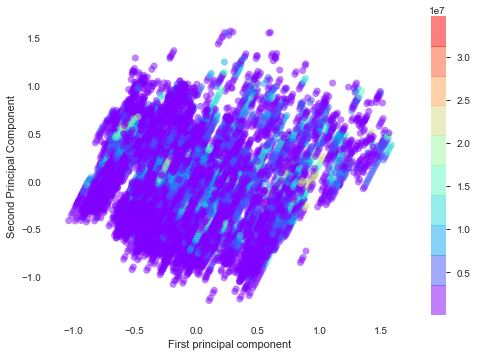

In [1243]:
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y[:], edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('rainbow', 10))
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.colorbar()

# === === === === === === === === ===
# === === === === === === === === ===

# T-SNE

In [497]:
def do_tsne(n_iter, perplexity = 25):
    time_start = time.time()
    tsne = TSNE(n_components=2, verbose=1, perplexity=perplexity, n_iter=n_iter)
    tsne_results = tsne.fit_transform(X)
    print('t-SNE done! Time elapsed: {} minutes'.format((time.time()-time_start) / 60))
    
    sb.scatterplot(tsne_results[:,0], tsne_results[:,1], legend='full', palette=palette)

In [499]:
do_tsne(250)

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 14163 samples in 0.110s...
[t-SNE] Computed neighbors for 14163 samples in 3.184s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14163
[t-SNE] Computed conditional probabilities for sample 2000 / 14163
[t-SNE] Computed conditional probabilities for sample 3000 / 14163
[t-SNE] Computed conditional probabilities for sample 4000 / 14163
[t-SNE] Computed conditional probabilities for sample 5000 / 14163
[t-SNE] Computed conditional probabilities for sample 6000 / 14163
[t-SNE] Computed conditional probabilities for sample 7000 / 14163
[t-SNE] Computed conditional probabilities for sample 8000 / 14163
[t-SNE] Computed conditional probabilities for sample 9000 / 14163
[t-SNE] Computed conditional probabilities for sample 10000 / 14163
[t-SNE] Computed conditional probabilities for sample 11000 / 14163
[t-SNE] Computed conditional probabilities for sample 12000 / 14163
[t-SNE] Computed conditional probabilities for sam

NameError: name 'sns' is not defined

# === === === === === === === === ===
# === === === === === === === === ===

# KMeans

In [ ]:
for k in range(1, 20):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)

# === === === === === === === === ===
# === === === === === === === === ===

# Spectral Clustering

In [ ]:
for k in range(1, 20):
    spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=0)
    spectral_clustering.fit(X)

# === === === === === === === === ===
# === === === === === === === === ===

# Notes / Problems

Schnell viele Features